# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df = pd.read_csv("data/Global_Cybersecurity_Threats_2015-2024.csv")
df.head()

# df.shape

# df.info()

# df.describe()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


**Análisis de perdidas en millones de dolares**

In [3]:
df.groupby("Attack Type")["Financial Loss (in Million $)"].agg(["mean","sum","count"]).sort_values("sum", ascending=False)

,mean,sum,count
Attack Type,,,
DDoS,52.035631,27630.92,531
Phishing,50.459905,26693.29,529
SQL Injection,50.013042,25156.56,503
Ransomware,49.653793,24479.32,493
Malware,49.418454,23967.95,485
Man-in-the-Middle,51.309085,23550.87,459


**Análisis de perdidas en millones de dolares**

In [4]:
df.groupby("Target Industry")["Number of Affected Users"].agg(["mean","sum","count"]).sort_values("sum", ascending=False)

,mean,sum,count
Target Industry,,,
IT,523210.939331,250094829,478
Banking,505839.114607,225098406,445
Healthcare,504130.340326,216271916,429
Education,513137.785203,215004732,419
Retail,488833.063830,206776386,423
Government,499352.431762,201239030,403
Telecommunications,495203.746898,199567110,403


**Pérdidas financieras por tipo de ataque**

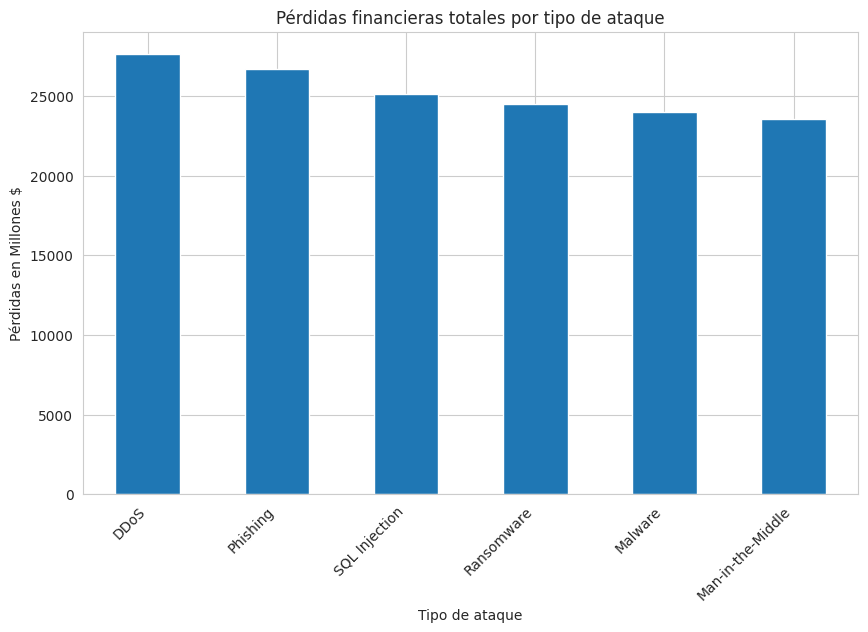

In [5]:
loss_by_attack = df.groupby("Attack Type")["Financial Loss (in Million $)"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
loss_by_attack.plot(kind="bar")
plt.title("Pérdidas financieras totales por tipo de ataque")
plt.ylabel("Pérdidas en Millones $")
plt.xlabel("Tipo de ataque")
plt.xticks(rotation=45, ha="right")
plt.show()

**Usuarios afectados por industria**

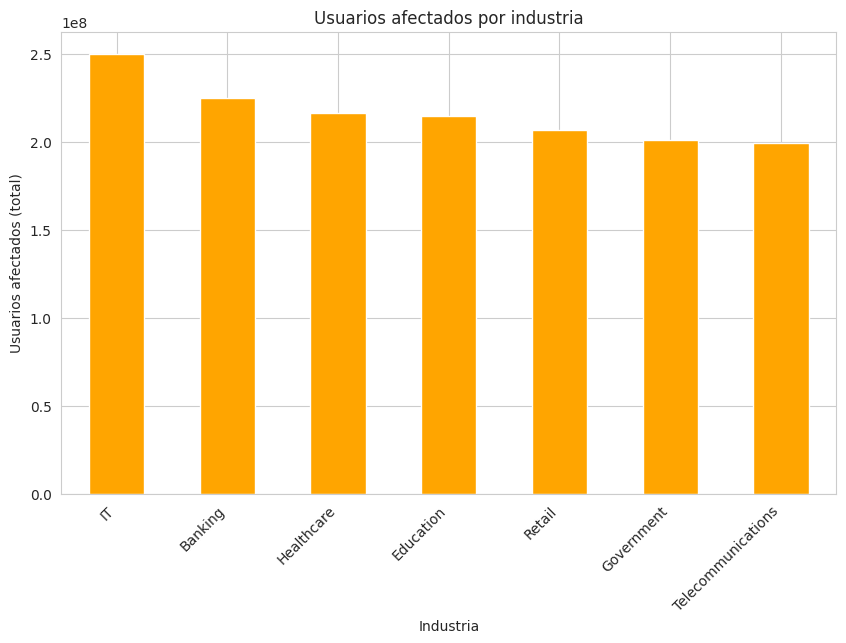

In [6]:
users_by_industry = df.groupby("Target Industry")["Number of Affected Users"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
users_by_industry.plot(kind="bar", color="orange")
plt.title("Usuarios afectados por industria")
plt.ylabel("Usuarios afectados (total)")
plt.xlabel("Industria")
plt.xticks(rotation=45, ha="right")
plt.show()


**Pérdida promedio por país (Top 10)**

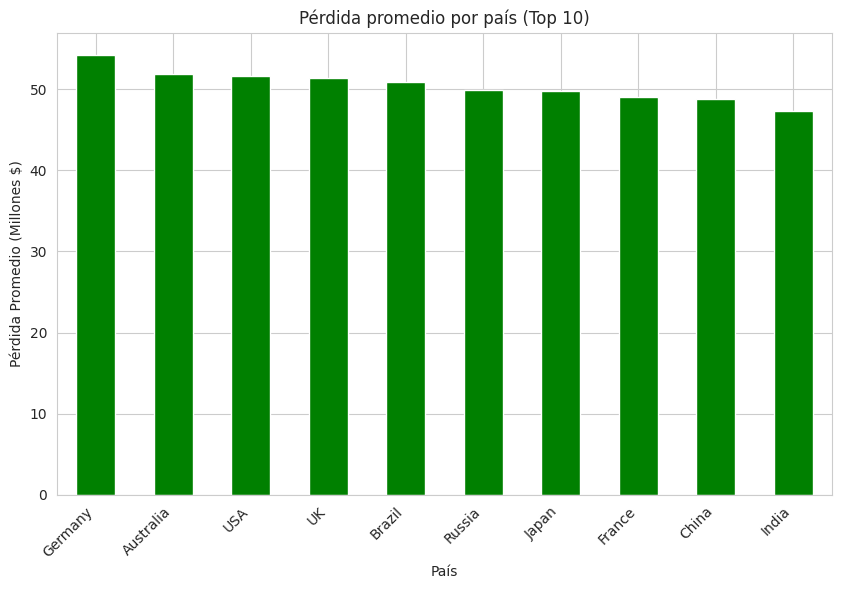

In [7]:
loss_by_country = df.groupby("Country")["Financial Loss (in Million $)"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
loss_by_country.plot(kind="bar", color="green")
plt.title("Pérdida promedio por país (Top 10)")
plt.ylabel("Pérdida Promedio (Millones $)")
plt.xlabel("País")
plt.xticks(rotation=45, ha="right")
plt.show()

**Tiempo de resolución por defensa usada**

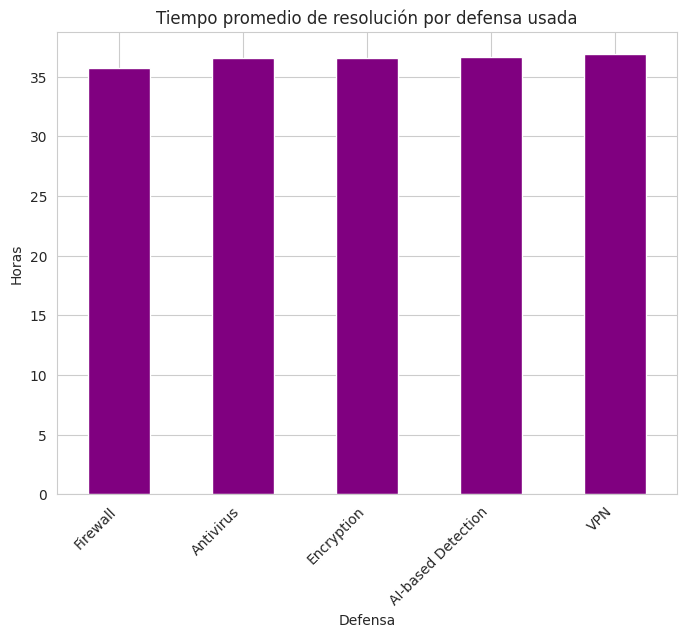

In [8]:
resolution_by_defense = df.groupby("Defense Mechanism Used")["Incident Resolution Time (in Hours)"].mean().sort_values()

plt.figure(figsize=(8,6))
resolution_by_defense.plot(kind="bar", color="purple")
plt.title("Tiempo promedio de resolución por defensa usada")
plt.ylabel("Horas")
plt.xlabel("Defensa")
plt.xticks(rotation=45, ha="right")
plt.show()

**Vulnerabilidades más frecuentes (Top 10)**

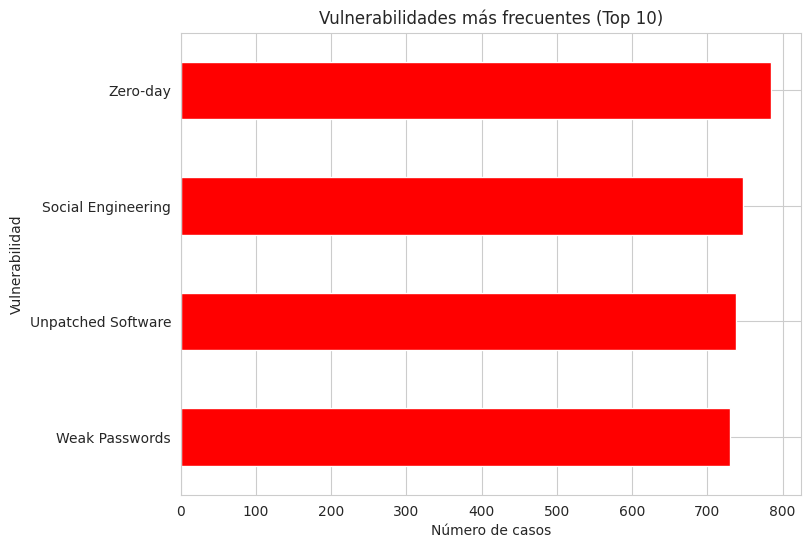

In [9]:
vulnerability_counts = df["Security Vulnerability Type"].value_counts().head(10)

plt.figure(figsize=(8,6))
vulnerability_counts.plot(kind="barh", color="red")
plt.title("Vulnerabilidades más frecuentes (Top 10)")
plt.xlabel("Número de casos")
plt.ylabel("Vulnerabilidad")
plt.gca().invert_yaxis()  # para que el más alto quede arriba
plt.show()

**Matriz de correlación**
correlaciones entre pérdidas, usuarios y tiempo de resolución.

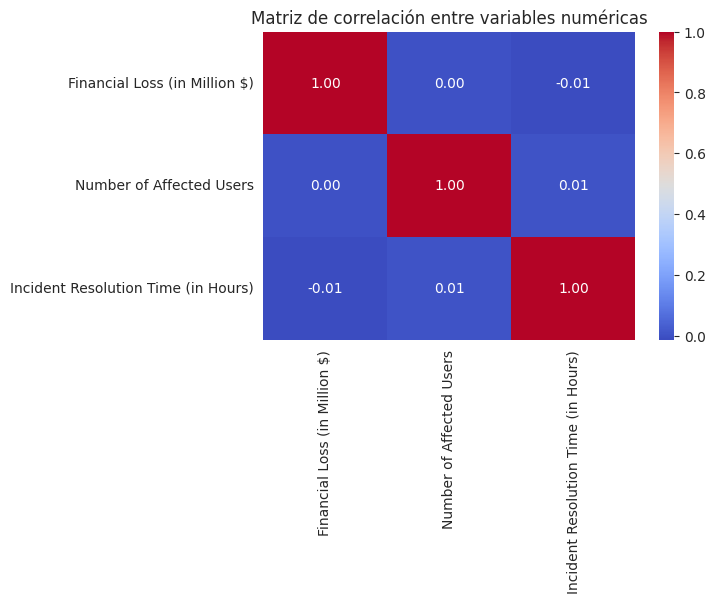

In [11]:
numeric_cols = ["Financial Loss (in Million $)", "Number of Affected Users", "Incident Resolution Time (in Hours)"]
num_df = df[numeric_cols]

corr = num_df.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

**Clustering con PCA**
Cada punto es un incidente y el color representa el cluster al que pertenece.

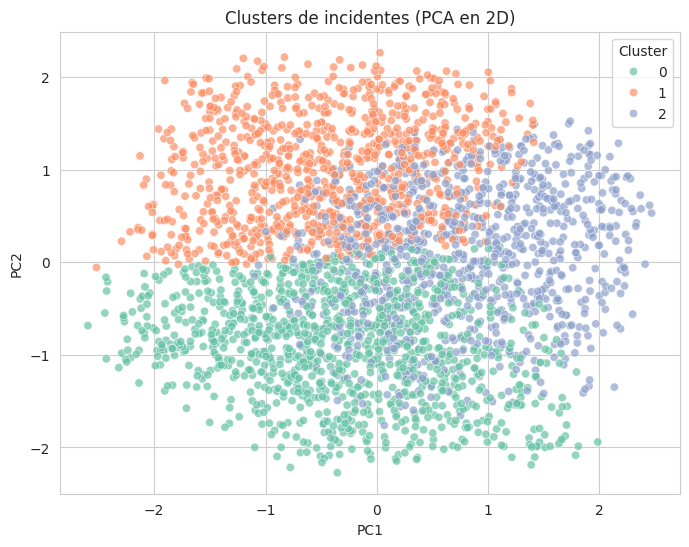

In [18]:
scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_df.dropna())

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(num_scaled)

pca = PCA(n_components=2)
num_pca = pca.fit_transform(num_scaled)

df_pca = pd.DataFrame(num_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = clusters

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster", palette="Set2", alpha=0.7)
plt.title("Clusters de incidentes (PCA en 2D)")
plt.show()